# <center>Decision Tree<center>

<p>Team Name:  B.C.
<p>Student Names: Brittney Jarreau, Caleb Charpentier, Leanne Nicholas
<p>Student W#s: 0455857, 0650629, 0670945

## Imports

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import sklearn.model_selection as model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn import metrics

# PART I

## Prepare Data

In [4]:
data = pd.read_csv("./Acoustic_Probing.csv")
data = data.drop(["ID", "Trial"], axis=1)

#We want to work on a Binary classification, so this should be updated 2 drop the shifted cases
# and group to either No Hole or Hole (filled or not doesn't matter)
values = ["Hole", "Hole Filled", "No Hole"]
data = data[data.Label.isin(values) == True]
data = data.drop(list(data.filter(regex="^(Amplitude at)+?.+")), axis=1)
data = data.drop(list(data.filter(regex="^(Phase at)+?.+")), axis=1)
data["Label"] = data['Label'].replace({'Hole Filled':'Hole'})

#DecisionTreeClassifier works on numeric only, need to encode
le = preprocessing.LabelEncoder()
data["Label"] = le.fit_transform(data["Label"].values)

display(data)

samples = data.drop(["Label"], axis=1)
labels = data.Label

,Tx Amplitude at -7,Tx Amplitude at -6,Tx Amplitude at -5,Tx Amplitude at -4,Tx Amplitude at -3,Tx Amplitude at -2.5,Tx Amplitude at -2,Tx Amplitude at -1.5,Tx Amplitude at -1,Tx Amplitude at -0.5,...,Tx Phase at -2,Tx Phase at -1.5,Tx Phase at -1,Tx Phase at -0.5,Tx Phase at 0,Tx Phase at 1,Tx Phase at 2,Tx Phase at 3,Tx Phase at 4,Label
0,0.001891,0.002083,0.004218,0.003733,0.018894,0.026597,0.027009,0.019226,0.025426,0.028832,...,0.503352,0.840757,0.634943,0.372477,0.053777,-0.220244,-2.933058,0.824031,-1.844182,0
1,0.001893,0.002078,0.004217,0.003736,0.018893,0.026582,0.027067,0.019299,0.025406,0.028816,...,0.501344,0.841286,0.635073,0.372084,0.051594,-0.210717,-2.900116,0.824106,-1.845349,0
2,0.001893,0.002078,0.004215,0.003734,0.018896,0.026557,0.027070,0.019292,0.025359,0.028769,...,0.499483,0.841865,0.633659,0.372149,0.052261,-0.218682,-2.892752,0.826299,-1.844914,0
3,0.001896,0.002073,0.004215,0.003732,0.018891,0.026565,0.027061,0.019285,0.025356,0.028755,...,0.498892,0.841142,0.634215,0.371543,0.050770,-0.212246,-2.902221,0.829220,-1.843085,0
4,0.001892,0.002078,0.004216,0.003732,0.018900,0.026538,0.027081,0.019307,0.025351,0.028718,...,0.499417,0.841852,0.633126,0.372358,0.050326,-0.221953,-2.903675,0.826953,-1.843601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.002440,0.001665,0.005208,0.005654,0.024287,0.041308,0.047161,0.057018,0.055985,0.040206,...,0.969952,0.753171,0.753971,0.594004,0.546144,-0.937365,2.757576,-0.053014,-1.509498,1
416,0.002439,0.001665,0.005213,0.005645,0.024236,0.041296,0.047157,0.057023,0.056035,0.040234,...,0.969666,0.752937,0.754755,0.593920,0.546005,-0.936613,2.756994,-0.052055,-1.509360,1
417,0.002434,0.001666,0.005211,0.005647,0.024247,0.041288,0.047138,0.057030,0.056002,0.040201,...,0.969572,0.752219,0.754181,0.593789,0.544501,-0.936233,2.757578,-0.051381,-1.510605,1
418,0.002431,0.001667,0.005206,0.005656,0.024226,0.041285,0.047134,0.057031,0.055954,0.040211,...,0.969181,0.753023,0.754354,0.594127,0.544593,-0.936405,2.756899,-0.050440,-1.507303,1


<b>Generate a decision tree by means of a Python library</b>
- Use 70% of the data for training and 30% for testing.
- Compare performance of the model based on “gini” and “entropy” measures. As a performance measure use sensitivity, specificity, AUC, and F1-score
- Plot performance measures on a single figure for “gini” and “entropy”. Group by performance measures.

Entropy Measures: 
GINI Measures: 


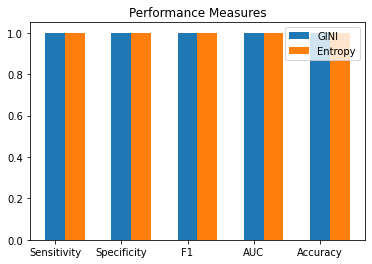

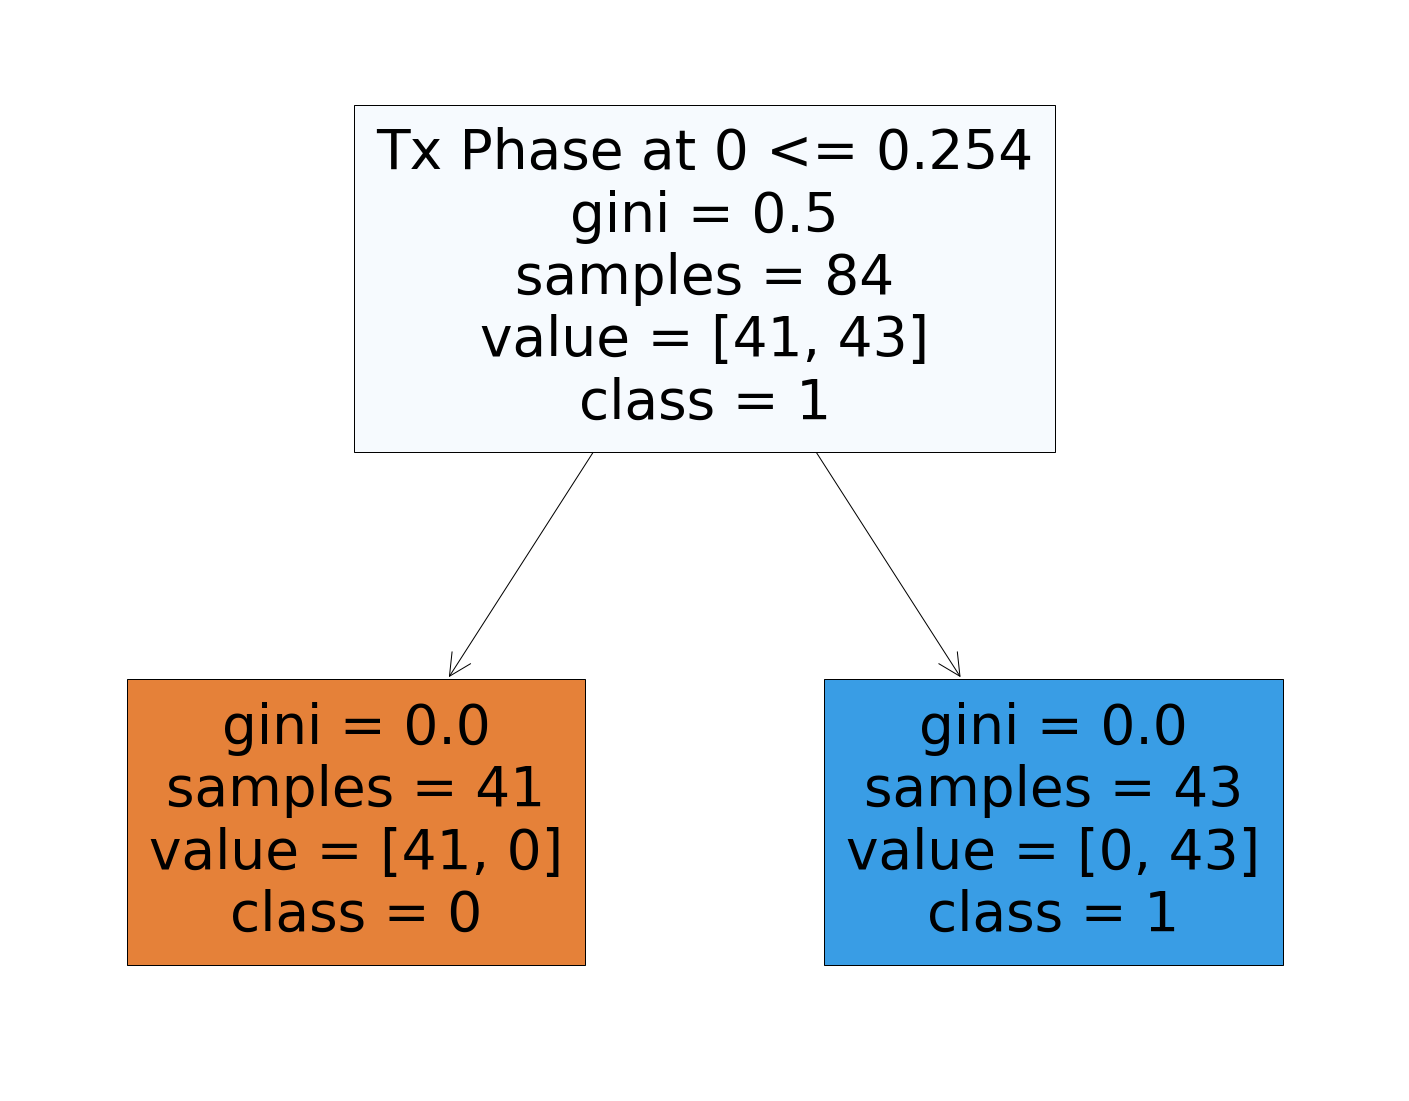

In [5]:
def get_scores(acc, labels, prediction):
    f1 = metrics.f1_score(labels, prediction)
    conf_matrix = metrics.confusion_matrix(labels, prediction)
    sens = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    spec = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    auc = metrics.roc_auc_score(labels, prediction)
    return sens, spec, f1, auc, acc

def add_plots(f1, sens, spec, auc, title):
  plt.bar(1, sens, label="{} Sensitivity".format(title))
  plt.bar(2, spec, label="{} Specificity".format(title))
  plt.bar(3, auc, label="{} AUC".format(title))
  plt.bar(4, f1, label="{} F1".format(title))

X_train, X_test, y_train, y_test = model_selection.train_test_split(samples, labels, train_size=0.70,test_size=0.30, random_state=42)

print("Entropy Measures: ") 
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)  
prediction = tree.predict(X_test)   
acc = tree.score(X_test, y_test)
sens, spec, f1, AUC, acc = get_scores(acc, y_test, prediction)
e_values = [sens, spec, f1, AUC, acc]

print("GINI Measures: ")
tree = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)  
prediction = tree.predict(X_test)  
acc = tree.score(X_test, y_test)
sens, spec, f1, AUC, acc = get_scores(acc, y_test, prediction)
g_values = [sens, spec, f1, AUC, acc]

labels = ["Sensitivity", "Specificity", "F1", "AUC", "Accuracy"]
plt.title("Performance Measures")
width =0.3
plt.xticks(range(len(labels)), labels)
plt.bar(np.arange(len(g_values)), g_values, width=width, label="GINI")
plt.bar(np.arange(len(e_values)) + width, e_values, width=width, label="Entropy")
plt.legend()
plt.show()

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree, max_depth=5, feature_names=samples.columns[:-1], class_names=['0','1'], filled=True)
plt.show()


## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://pythonbasics.org/matplotlib-bar-chart/
https://www.statology.org/auc-in-python/
https://gist.github.com/jaradc/eeddf20932c0347928d0da5a09298147#:~:text=Four%20different%20ways%20to%20calculate%20entropy%20in%20Python,%28%20labels%2C%20return_counts%3DTrue%29%20return%20entropy%20%28%20counts%2C%20base%3Dbase%29